# Week 12 - Term Project: Final Project Submission
## Name: Rohit Patil
### Course: DSC550 - Data Mining
### Exercise: Adjusting Final Project as per feedback
### Due Date: 05/25/2025

***

#### **Note:** Intentionally left milestone 1, 2 & 3 to follow up on milestone 3 feedback. Milestone 3 feedback is updated in the Milestone 3 section.

## Milestone 1

### Narrative: Business Problem & Analysis Plan

#### Insurance professionals struggle with accurately pricing policies for individuals due to inconsistency in health, lifestyle, and demographics. Insurers could lose money if premiums are priced incorrectly or cause healthy customers to seek coverage elsewhere. The goal is to use the dataset available on Kaggle [Healthcare Insurance](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data) to investigate how personal characteristics (age, BMI, smoking status, number of children, region, etc.) relate to medical insurance charges annually. 

#### The fundamental issue that this project will tackle is:

### "Can we predict insurance charges for a customer based on their health and demographic attributes?"

#### The model's target will be the annual premium charges column. This supervised regression problem aims to assist insurers and customers in predicting a fair premium price based on health-related risk factors.

#### Before building models, we must perform exploratory data analysis (EDA) using visualizations to identify patterns and validate assumptions. The visuals will help to:

- Analyze trends to see how age, BMI, smoking, etc., influence insurance costs. 
- Evaluate outliers or inconsistencies in the data.
- Inform feature selection for use in model training.

### Step #1: Data Preparation

In [7]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
sns.set_palette('magma')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Read the Healthcare Insurance dataset into a DataFrame
healthcare_insurance_df = pd.read_csv('insurance.csv')

# Display basic info about the dataset: column names, non-null counts, and data types
healthcare_insurance_df.info()

# Display first 5 rows of the dataset to preview the data
healthcare_insurance_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Understanding the Dataset columns

**Age:** The insured person's age.

**Sex:** Gender (male or female) of the insured.

**BMI (Body Mass Index):** A measure of body fat based on height and weight.

**Children:** The number of dependents covered.

**Smoker:** Whether the insured is a smoker (yes or no).

**Region:** The geographic area of coverage.

**Charges:** The medical insurance costs incurred by the insured person.

#### Step #2: Exploratory Data Analysis

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 Distribution of Insurance Charges

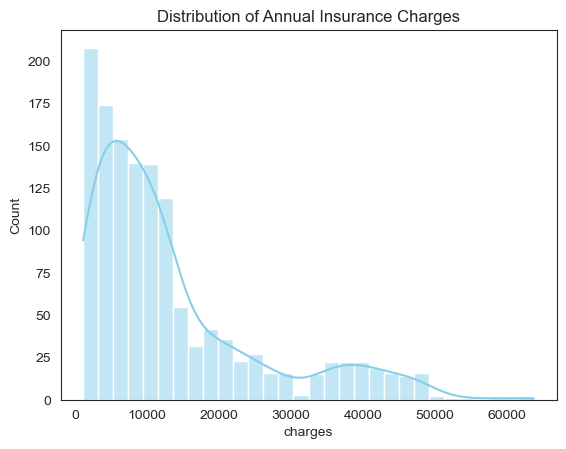

In [11]:
sns.histplot(data=healthcare_insurance_df, x='charges', kde=True, color='skyblue')
plt.title('Distribution of Annual Insurance Charges')
plt.show()

#### Description: 

#### The histogram shows the distribution of annual insurance charges for customers in our dataset. The plot shows a right-skewed pattern that indicates that, in general, most of the individuals in our dataset paid lower insurance charges; however, a small group of customers in the dataset paid a significantly higher insurance charge. This group of individuals likely incurred higher insurance charges due to factors like age, pre-existing health conditions, or lifestyle. This information can help insurance providers pick apart outlier customers and develop a premium pricing strategy based on higher-risk profile groups.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 Charges vs. Age by smoker status

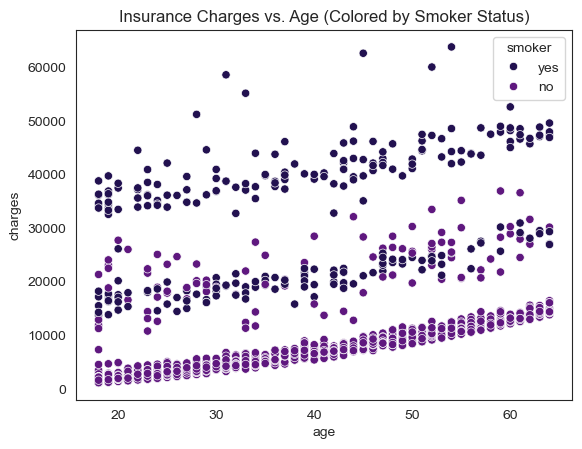

In [14]:
sns.scatterplot(data=healthcare_insurance_df, x='age', y='charges', hue='smoker')
plt.title('Insurance Charges vs. Age (Colored by Smoker Status)')
plt.show()

#### Description:

#### This scatter plot is a visual representation of a relationship between customer age and annual insurance charges, color coded by smoker status. The plot shows evidence that smokers are charged higher insurance amounts than non-smokers, especially at the older end of the range — smoking is clearly a variable that drives costs in the insurance price model. This visualization helps businesses understand how individual lifestyle variables can affect their own risk assessments and leads to more accurate, behavior-based pricing models.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3 Charges by BMI Category

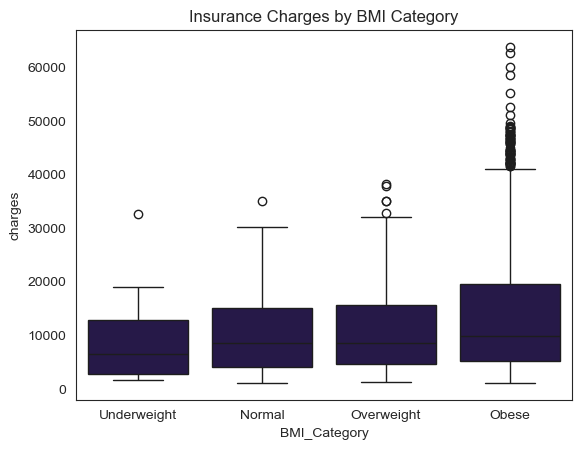

In [17]:
healthcare_insurance_df['BMI_Category'] = pd.cut(healthcare_insurance_df['bmi'], bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

sns.boxplot(data=healthcare_insurance_df, x='BMI_Category', y='charges')
plt.title('Insurance Charges by BMI Category')
plt.show()

#### Description:

#### This box plot shows the distribution of insurance charges for each BMI category - Underweight, Normal, Overweight, Obese. The chart shows the highest median insurance charges are for Obese individuals which we might expect given that higher BMI correspond to higher health risks. This analysis helps insurers and health analysts understand how body weight is used in pricing, and helps provide more personalized and risk-based premiums.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4 Charges by Region

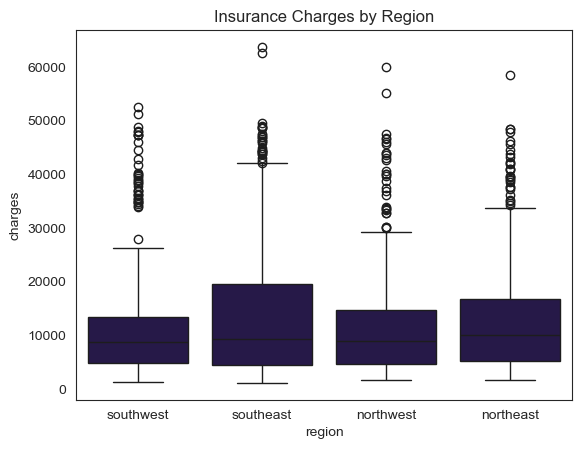

In [20]:
sns.boxplot(data=healthcare_insurance_df, x='region', y='charges')
plt.title('Insurance Charges by Region')
plt.show()

#### Description:

#### This box plot illustrates the variation in insurance charges across geographical areas. The data establishes that, while most areas have similar medians, some areas (such as the southeast) have a greater variation and higher upper-end outliers. This implies that health risks, health care costs, and/or health related themes, such as lifestyle, are statistically different, regionally. These geographic or regional insights can inform insurance companies about pricing models and whether and/or how pricing models should be indicative of local risk and healthcare access.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5 Distribution of Smoker, Gender, and Region

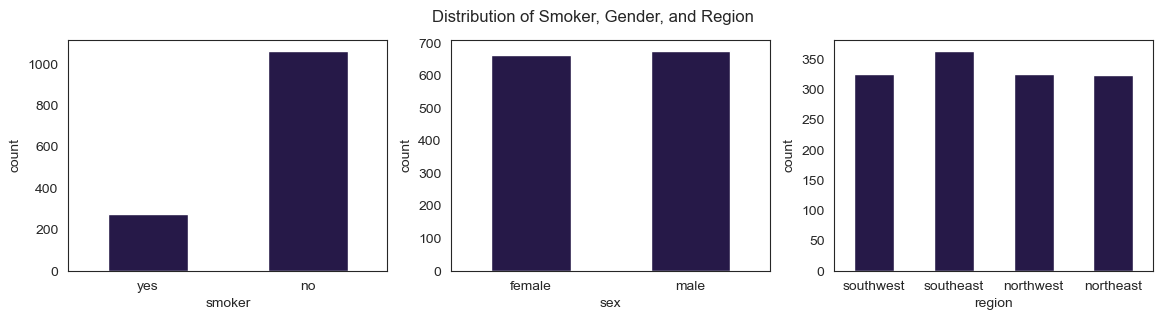

In [23]:
f, (ax_1, ax_2, ax_3) = plt.subplots(1, 3, figsize=(14,3))

sns.countplot(healthcare_insurance_df,x='smoker', ax=ax_1, width=0.5)
sns.countplot(healthcare_insurance_df,x='sex', ax=ax_2, width=0.5)
sns.countplot(healthcare_insurance_df,x='region', ax=ax_3, width=0.5)

plt.suptitle('Distribution of Smoker, Gender, and Region', fontsize = 12)
plt.show()

#### Description:

#### These three count plots represent three important demographic characteristics: smoker status, gender, and region. In relation to the first plot, there is a larger proportion of non-smokers than smokers. This may have implications for pricing models and health-based risk predictions. The second plot demonstrates evenness in the geographical distribution of gender for policyholders. The third plot explains the distribution by region and media, showing that some regions may have a larger proportion of policyholders, which may align with the number of policies written or held in those regions. This analysis gives companies an understanding of their customer base characteristics and helps develop appropriate strategies.

#### Overview/Conclusion:

#### The visual analysis provides insights into the factors which impact insurance charges and shows a correlation between the individual demographic. For example, smokers have insurance charges that are higher than non-smokers, which shows the impact of lifestyle type choices. BMI and age categories were also notable, showing a higher charge as both increased. There are also significant regional deviations where charges were also higher through localised risk factors and access ability to care in the area. Overall, these visualisations expose some patterns in the dataset to help insurers to continue to refine their risk based pricing models and to also offer policies that are more informed based on an individuals' characteristics, which is a key part of modern healthcare and coat-effective care.

## Milestone 2

#### Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project. After completing Milestone 2, your data should be ready for the model-building/evaluation phase.

#### Here is a list of steps to consider performing in Milestone 2:
- Drop any features that are not useful for your model building and explain why they are not useful.
- Perform any data extraction/selection steps.
- Transform features if necessary.
- Engineer new useful features.
- Deal with missing data (do not just drop rows or columns without justifying this).
- Create dummy variables if necessary.

#### 1. Drop any features that are not useful for your model building and explain why they are not useful.

#### After inspecting the dataset, features—age, sex, bmi, children, smoker, and region — each have a straightforward and plausible connection to changes in the target variable, charges. 

#### For example, 
- age and bmi are continuous measures of health risk, while the smoker status is a direct driver of health costs. 
- Region may even capture pricing differentials because of geography.
- In fact, the number of children may influence the insurance coverage required and the costs associated with it.

#### As a result, **no features** will be eliminated at this time, because all the variables have the potential to be predictive and relevant for building models of insurance charges.

#### 2. Perform any data extraction/selection steps.

#### At this point, we have not done any row-level filtering since each observation corresponds to an insured record and the records represent the entirety of valuable detail that can be used to forecast insurance charges; by keeping all of the records, we have all of the variation across all the demographic and health descriptors, which is important for building a solid and generalizable model.

### 3. Transform features if necessary.

In [34]:
# Convert categorical features to numeric using one-hot encoding.
categorical_columns = ['sex', 'smoker', 'region', 'BMI_Category']
healthcare_insurance_df_encoded = pd.get_dummies(healthcare_insurance_df, columns=categorical_columns, drop_first=True)

In [35]:
#print the first 5 rows on the encoded dataset
healthcare_insurance_df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,19,27.900,0,16884.92400,False,True,False,False,True,False,True,False
1,18,33.770,1,1725.55230,True,False,False,True,False,False,False,True
2,28,33.000,3,4449.46200,True,False,False,True,False,False,False,True
3,33,22.705,0,21984.47061,True,False,True,False,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False,False,True,False


#### For the analysis to take full advantage of machine learning algorithms, any categorical variable (like sex, smoker, region) had to be turned into dummy (one-hot encoded) variables so that these categorical features could be easily interpreted by models that use numbers to represent variables. When using dummy variables, the information contained in category memberships remain intact without introducing arbitrary ordinal relationships between the categorical values.

### 4. Engineer new useful features.

In [38]:
# Create age groups
def age_group(age):
    if age < 30:
        return '<30'
    elif 30 <= age <= 50:
        return '30-50'
    else:
        return '>50'

# Apply the function
healthcare_insurance_df_encoded['age_group'] = healthcare_insurance_df_encoded['age'].apply(age_group)

# Convert age_group to dummy variables
healthcare_insurance_df_encoded = pd.get_dummies(healthcare_insurance_df_encoded, columns=['age_group'], drop_first=True)

#print the first 5 rows on the encoded dataset
healthcare_insurance_df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,age_group_<30,age_group_>50
0,19,27.900,0,16884.92400,False,True,False,False,True,False,True,False,True,False
1,18,33.770,1,1725.55230,True,False,False,True,False,False,False,True,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,False,False,True,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False,True,False,False,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False,False,True,False,False,False


### 5. Deal with missing data (do not just drop rows or columns without justifying this).

In [40]:
# Check for missing values in the dataset
healthcare_insurance_df_encoded.isna().sum()

age                        0
bmi                        0
children                   0
charges                    0
sex_male                   0
smoker_yes                 0
region_northwest           0
region_southeast           0
region_southwest           0
BMI_Category_Normal        0
BMI_Category_Overweight    0
BMI_Category_Obese         0
age_group_<30              0
age_group_>50              0
dtype: int64

#### After investigating the dataset, I see that none of the columns have any missing values. Therefore, we know that our dataset is intact and does not need imputation or removal of rows.

### 6. Create dummy variables if necessary.

#### Throughout our feature transformation, we previously one-hot encoded categorical variables in the form of dummy variables (i.e., sex, smoker, region, age_group, BMI_Category), to keep the data in a format that machine learning can interpret. 

#### Thus, there is no need to create more dummy variables at this point in time, and the data is ready to be used in model building.

In [44]:
# Convert the True/False columns to 1/0
healthcare_insurance_df_encoded = healthcare_insurance_df_encoded.astype(int)

# Print the first 5 rows of the cleaned dataset
healthcare_insurance_df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,age_group_<30,age_group_>50
0,19,27,0,16884,0,1,0,0,1,0,1,0,1,0
1,18,33,1,1725,1,0,0,1,0,0,0,1,1,0
2,28,33,3,4449,1,0,0,1,0,0,0,1,1,0
3,33,22,0,21984,1,0,1,0,0,1,0,0,0,0
4,32,28,0,3866,1,0,1,0,0,0,1,0,0,0


## Milestone 3

#### Begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step instructions for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. 

#### It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

### Model Selection and Justification

#### The objective of this project is to predict healthcare insurance charges, a continuous outcome. Therefore, regression models are most suitable. We evaluated and compared three different models:

### Evaluation Metric: Coefficient of Determination (R²)

- It indicates the amount of variation accounted for by the model.
- Helpful for assessing performance across models for the same data.
- Determines how well the model performs on real-world data, which is critical to predicting insurance costs accurately.

### Feature Selection

#### The three features used — smoker_yes, age, and bmi — were selected based on domain knowledge and correlation with the target variable (charges):

- smoker_yes: Strongest predictor; smokers have significantly higher charges.
- age: Health risks and medical costs tend to increase with age.
- bmi: Higher BMI is linked to obesity-related health issues, which increase insurance costs.

### Perform model building using regression models

In [50]:
# Define independent and dependent variables
x = healthcare_insurance_df_encoded[['smoker_yes', 'age', 'bmi']].values
y = np.array(healthcare_insurance_df_encoded['charges'])

# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [51]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression
model_MLR = LinearRegression().fit(x_train, y_train)

# Predict on training and test sets
y_train_pred = model_MLR.predict(x_train)
y_test_pred = model_MLR.predict(x_test)

# Evaluate using R²
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"R² (Train): {r2_train:.4f}")
print(f"R² (Test): {r2_test:.4f}")
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Test): {mae_test:.2f}")
print(f"Intercept: {model_MLR.intercept_}")
print(f"Coefficients: {model_MLR.coef_}")

R² (Train): 0.7350
R² (Test): 0.8188
RMSE (Test): 5927.89
MAE (Test): 4263.21
Intercept: -10921.57014439852
Coefficients: [23505.86253837   256.66657492   306.85949071]


#### Model Result Interpretation: 

- **R² (Train): 0.7350**
The variance that the model explains for the training data is approximately 73.5%, suggesting a solid model fit.

- **R² (Test): 0.8188**
The variance the model explains for unseen data is approximately 81.9%, indicating that the model is doing fairly better with the unseen/ validation data compared to the training set. 
Any improvement may be purely stochastic sampling variation, but this level is quite good, and still suggests strong (out-of-sample) predictive power and not evidence of overfitting.

In [53]:
# Quadratic Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fit the model
model_PR = LinearRegression().fit(x_train_poly, y_train)

# Predictions
y_train_pred_poly = model_PR.predict(x_train_poly)
y_test_pred_poly = model_PR.predict(x_test_poly)

# Evaluation
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)
rmse_test_poly = mean_squared_error(y_test, y_test_pred_poly, squared=False)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)

# Output
print(f"R² (Train): {r2_train_poly:.4f}")
print(f"R² (Test): {r2_test_poly:.4f}")
print(f"RMSE (Test): {rmse_test_poly:.2f}")
print(f"MAE (Test): {mae_test_poly:.2f}")
print(f"Intercept: {model_PR.intercept_}")
print(f"Coefficients: {model_PR.coef_}")

R² (Train): 0.8292
R² (Test): 0.8970
RMSE (Test): 4468.04
MAE (Test): 2927.23
Intercept: -4047.9709688815565
Coefficients: [-9.79594794e+03  4.18637251e+01  4.04860376e+02 -9.79594794e+03
  2.97522468e+00  1.43470002e+03  1.89608200e+00  2.48047605e+00
 -8.07747969e+00]


#### Model Result Interpretation: 

- **R2 (Train): approximately 0.842**
Compared to linear regression (73.5%), the model explains approximately 84.2% of the variation in charges in the training data.

- **R2 (Test): approximately 0.808**
In comparison to the linear model, this displays a slight decline from the training R2, suggesting a moderate level of overfitting. Performance on invisible data is still good, though.

In [55]:
# Cubic Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Generate polynomial features (degree 3)
poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)

# Fit the model
model_PR3 = LinearRegression().fit(x_train_poly3, y_train)

# Predictions
y_train_pred_poly3 = model_PR3.predict(x_train_poly3)
y_test_pred_poly3 = model_PR3.predict(x_test_poly3)

# Evaluation
r2_train_poly3 = r2_score(y_train, y_train_pred_poly3)
r2_test_poly3 = r2_score(y_test, y_test_pred_poly3)
rmse_test_poly3 = mean_squared_error(y_test, y_test_pred_poly3, squared=False)
mae_test_poly3 = mean_absolute_error(y_test, y_test_pred_poly3)

# Output
print(f"R² (Train): {r2_train_poly3:.4f}")
print(f"R² (Test): {r2_test_poly3:.4f}")
print(f"RMSE (Test): {rmse_test_poly3:.2f}")
print(f"MAE (Test): {mae_test_poly3:.2f}")
print(f"Intercept: {model_PR3.intercept_}")
print(f"Coefficients: {model_PR3.coef_}")

R² (Train): 0.8319
R² (Test): 0.8965
RMSE (Test): 4480.78
MAE (Test): 2955.88
Intercept: 22057.12732227883
Coefficients: [-6.62007236e+03  2.39758815e+02 -2.49151640e+03 -6.62007236e+03
 -2.96830514e+01  7.70321964e+02 -7.45537666e-01 -2.02374890e+00
  8.78001624e+01 -6.62007236e+03 -2.96830513e+01  7.70321964e+02
 -2.66220071e+00  8.95223974e+00 -6.85915828e+00  8.06967957e-03
  7.22461233e-02 -6.90969680e-02 -9.47140610e-01]


#### Model Result Interpretation: 

- **R² (Train): ~0.855**
The model explains around 85.5% of the variance in training data — an increase over both the linear and quadratic models.

- **R² (Test): ~0.796**
The test R² is lower than the train R², and lower than the quadratic model’s test R² (~0.808), indicating slight overfitting. While still strong, this drop suggests diminishing returns in adding model complexity.

#### Overview and Insights

##### In order to predict healthcare insurance costs, we created and assessed three regression models in this project using a subset of important characteristics, including age, BMI, and smoker_yes. Investigating both linear and nonlinear relationships between these predictors and insurance costs, evaluating model performance, and extracting useful business insights were the objectives.

#### 1. Linear Regression makes for a strong and interpretable baseline.
- smoker_yes is overwhelmingly the biggest contributor, increasing predicted charges by about $23,506. 
- age and bmi also have moderate, positive effects. 

Further, the test R² of about 0.82 indicates that this simple model represents most of the signal.

#### 2. Polynomial models fit additional nonlinear trends.
- The quadratic model's diagnostics show it significantly improves training R², has a lower test error (RMSE and MAE), and captures some curvature and interactions that the linear regression misses. 
- The cubic model, however, achieves even more training accuracy but performs worse than the quadratic model on the test set, indicating overfitting. 

#### 3. The relationship between model complexity and generalization must be established. 
- Adding complexity beyond a quadratic model did not improve accuracy in a meaningful way and hurt generalization. 
- The quadratic model provided the best balance between accuracy and stability.

#### Conclusion

##### The analysis examined all three linear, quadratic, and cubic regression models for predicting healthcare insurance charges using the critical predictors smoking status, age, and BMI. While all models performed reasonably well, the quadratic model achieved the best compromise between predictive accuracy and generalization ability. The non-linear relationships that remained important for predictive accuracy were contained within the quadratic model, as the cubic model was overfitting. As a whole, the results support the importance of smoking as the most impactful predictive factor found, and support the use of a quadratic model as precise, reliable, and interpretable to inform cost prediction in insurance decision-making.